# Module 6 Unit 2
## Clustering data using K-means

In [1]:
# Import libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Starting with a simple (artificial) example


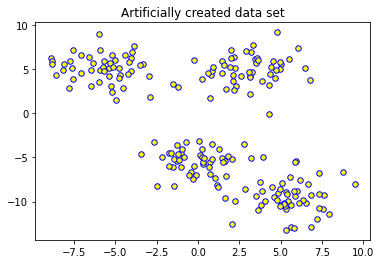

In [2]:
# Scikit-learn has a make_blobs function to make data sets
from sklearn.datasets import make_blobs

# Create data set
X, y = make_blobs(n_samples=200, n_features=2, 
                  centers=4, cluster_std=1.7,
                  random_state=10, shuffle=True)

# Plot
plt.title('Artificially created data set')
plt.scatter(X[:, 0], X[:, 1], c='yellow', marker='o', edgecolor='blue', s=30)
plt.show()

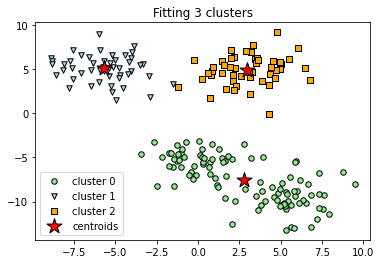

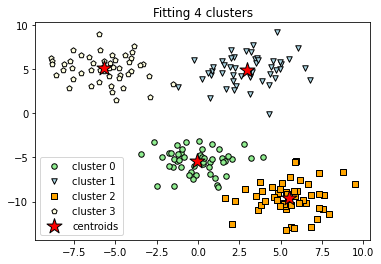

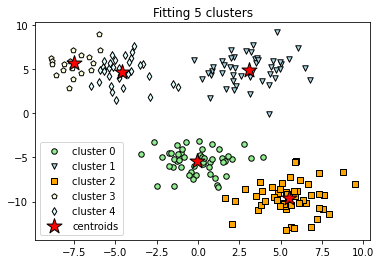

In [3]:
# Let's try to fit K-means with 3, 4, and 5 clusters, respectively

for nr_clusters in range(3,6):
    # Fit K-means
    km = KMeans(n_clusters=nr_clusters, init='random', n_init=10, 
                max_iter=200, tol=1e-04, random_state=1)
    y_km = km.fit_predict(X)
    
    # Plot the clusters
    colours = ['lightgreen', 'lightblue', 'orange', 'lightyellow', 'lightcyan']
    markers = 'ovspd'
    for cluster_nr in range(nr_clusters):
        plt.scatter(X[y_km==cluster_nr, 0], X[y_km==cluster_nr, 1],
                    s=30, c=colours[cluster_nr], marker=markers[cluster_nr], 
                    edgecolor='black', label='cluster '+str(cluster_nr))
    # Plot the centroids
    plt.title('Fitting '+str(nr_clusters)+' clusters')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
                s=250, marker='*', c='red', edgecolor='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.show()

To find the "best" number of clusters, you will calculate the distortion (sum of squared differences between observations & centroids) and look for the elbow in the graph.
Determining the elbow is often quite subjective.

In [4]:
# Calculate the distortion for a range of number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', 
                n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])

# Plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

An alternative method to use in conjunction with the elbow method is the silhouette method.
This measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

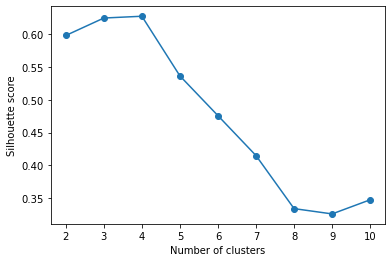

In [5]:
# Silhouette method
sil = []
kmax = 10

# Dissimilarity would not be defined for a single cluster 
# Thus, there should be a minimum of two clusters
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

## Real-world example: Credit card holders

In [6]:
# Import data
df = pd.read_csv("CC GENERAL.csv",delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: 'CC GENERAL.csv'

The credit card data "CC general.csv" was obtained from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). This data set is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) licence.


In [ ]:
# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

In [ ]:
# Explore type of data and feature names
df.head(8)

Make a point of knowing your data and how zeros will affect analysis.

In [ ]:
# Remove the CUST_ID
X = df.iloc[:,1:] 

### Find the optimum number of clusters

The rule of thumb to calculate the number of clusters is $\sqrt{\frac{n}{2}}$, where *n* is the number of features. Here the number of features is 17 so:  
$k = \sqrt{\frac{17}{2}}$


In [ ]:
# 1. Rule of thumb method
print("The rule of thumb =", math.sqrt((17/2)))

In [ ]:
# 2. Elbow method

# Calculate distortions
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, 
                max_iter=300,tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The distortion seems to slow down at 2. 
This is often a very subjective choice after looking at the plot.

In [ ]:
# 3. Silhouette method
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# Fit
km = KMeans(n_clusters=2, init='k-means++', 
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
km.fit(X) 

In [ ]:
# See the first few cluster allocations (labels)
print("First few cluster labels:",km.labels_[:65])

# Clearly, more samples are assigned to cluster 0 than cluster 1
print("Cluster 0 size: %s \nCluster 1 size: %s"
      % (len(km.labels_)- km.labels_.sum(), km.labels_.sum()))

In [ ]:
# Set up a dataframe with cluster allocations
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_
Xnew.sample(8, random_state=0)   

### Analyse the clusters



In [ ]:
# Plot the variables you think may be important against each other
var = ["BALANCE", "PURCHASES","CREDIT_LIMIT","PAYMENTS"]

# Plot using seaborn
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 4))

Distributions of the data have atoms, where a lot of data lies for both the splits. The data is too close together and stretched, so it is not easily separable. You need to transform the data into a "rounder" shape. Common transformations are log or square root transforms.

## Repeat process after square root transformation

In [ ]:
# Remove the CUST_ID and transform using square root 
X = np.sqrt(df.iloc[:,1:])

### Find the optimum number of clusters

In [ ]:
# 1. Elbow method
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='random',
                n_init=10, max_iter=300,
                tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# 2. Silhouette method
sil_2 = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil_2.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil_2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# Fit
km = KMeans(n_clusters=2, init='random', 
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
km.fit(X)

# The two clusters are slightly more balanced
print("Cluster 0 size: %s \nCluster 1 size: %s"
      % (len(km.labels_)- km.labels_.sum(), km.labels_.sum()))

In [ ]:
# Set up dataframe with cluster allocations
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_
Xnew.head()   # Note the much smaller values

### Analyse the clusters again

In [ ]:
# Plot
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 4))

After transforming the data into more of a rounder shape, the algorithm splits more easily. See how the distributions have changed and how the data is now linearly separated into clear cuts. 

See what would happen if three clusters are used instead of two.

In [ ]:
# Fit
km = KMeans(n_clusters=3, init='random', 
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
km.fit(X)

# Set up dataframe with cluster allocations
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_

# Plot
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 4)) 

# Add the parameter plot_kws={"s": 10} if you want smaller markers

Looking at the selected **key** features, which gives a more intuitive interpretation, two or three clusters?

Continue to the next activity to discuss the analysis of the clusters.